In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [4]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [5]:
def log_mod(x):
    return np.log(abs(x))

In [6]:
# input: filename prefix and # of files
# output: list of dataframes that are smaller than the original one
# splits a dataframe into dataframes of the desired length (aka chunk_size)
def read_dataframes(filename = "spx_minute_data-", numfiles = 11):     
    chunks = [''] * numfiles
    for i in range(numfiles):
        chunks[i] = pd.read_csv(f"{filename}{i}.csv", index_col=[0])
    chunks = pd.concat(chunks)
    return chunks

In [7]:
spx_price_day = pd.read_csv('data/SPX-Price-Daily.csv')
spx_price_minute = read_dataframes("data/spx_minute_data-")
spx_price_minute = spx_price_minute.drop(['ticker.1', 'trade_date.1'], axis = 1)

In [9]:
spx_price_minute = read_dataframes("data/spx_minute_data-")
spx_price_minute = spx_price_minute.drop(['ticker.1', 'trade_date.1'], axis = 1)

In [11]:
spx_gamma = pd.read_csv('data/spx-gamma-dix.csv')

##### SPX Gamma exposure over time

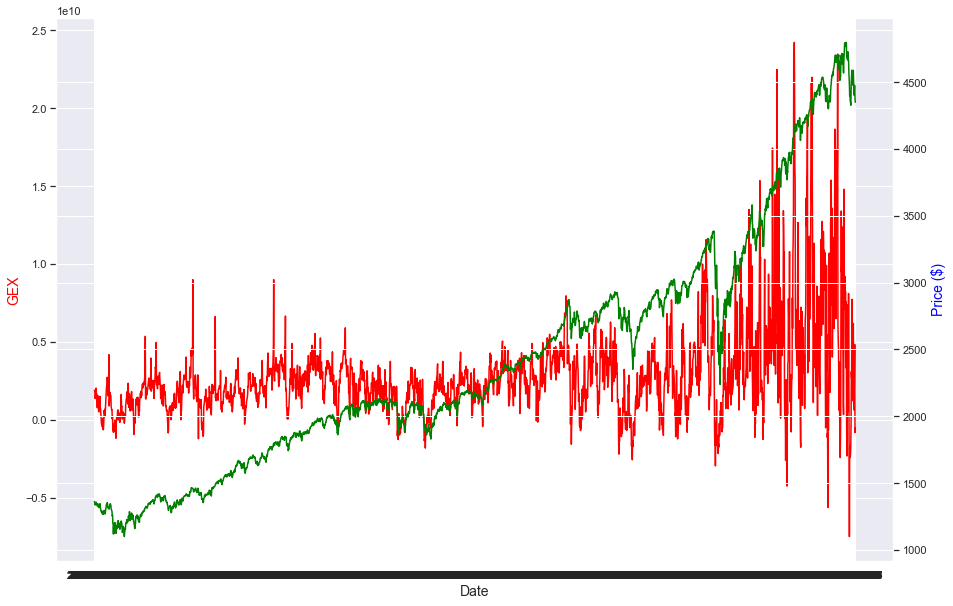

In [24]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(spx_gamma['date'],spx_gamma['gex'], color="red")
# set x-axis label
ax.set_xlabel("Date",fontsize=14)
# set y-axis label
ax.set_ylabel("GEX",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(spx_gamma['date'],spx_gamma['price'],color="green")
ax2.set_ylabel("Price ($)",color="blue",fontsize=14)
plt.show()
# save the plot as a file
# fig.savefig('two_different_y_axis_for_single_python_plot_with_twinx.jpg',
#             format='jpeg',
#             dpi=100,
#             bbox_inches='tight')
# plt.plot(spx_gamma['date'],spx_gamma['gex'])
# plt.plot(spx_gamma['date'],spx_gamma['price'])
# #plt.plot(spx_gamma['date'],spx_gamma['dix'])
# plt.legend(['GEX','price','dix'])
# plt.xlabel("date")
# plt.show()

In [25]:
spx_price_day.rename(columns={'pricing_date':'date'}, inplace=True)
spx_price_day.head()

,Unnamed: 0,trading_item_id,date,open,high,low,mid,close,bid,ask,volume,adjustment_factor,split_adjustment_factor,dividend_adjustment,vwap
0,0,6179710,2011-05-02,111.335451,111.424799,110.425729,110.649098,110.645037,110.645037,110.653159,126310033.0,NaN,1.0,0.812253,110.864345
1,1,6179710,2011-05-03,110.433851,110.620669,109.690640,110.242972,110.247033,110.238910,110.247033,138445808.0,NaN,1.0,0.812253,110.133318
2,2,6179710,2011-05-04,110.198298,110.247033,109.028654,109.520067,109.516006,109.516006,109.524128,182821163.0,NaN,1.0,0.812253,109.637844
3,3,6179710,2011-05-05,108.906816,109.613476,108.045829,108.545364,108.525058,108.541303,108.549425,227065699.0,NaN,1.0,0.812253,109.028654
4,4,6179710,2011-05-06,109.605353,110.165808,108.208279,108.983980,109.004287,108.979919,108.988042,222951264.0,NaN,1.0,0.812253,109.645966


In [26]:
spx_price_minute.rename(columns={'trade_date':'date'}, inplace=True)
spx_price_minute.head()

,ticker,date,open_bar_time,open_bid_price,open_bid_size,open_ask_price,open_ask_size,first_trade_time,first_trade_price,first_trade_size,...,downtick_volume,repeat_uptick_volume,repeat_downtick_volume,unknown_tick_volume,trade_to_mid_vol_weight,trade_to_mid_vol_weight_relative,time_weight_bid,time_weight_ask,price_adjustment_factor,volume_adjustment_factor
0,SPY,2011-05-02,2011-05-02T13:30:00+00:00,111.3266,89500.0,111.3347,3600.0,2011-05-02T13:30:00.030000+00:00,111.3347,200.0,...,151435.0,705600.0,793798.0,0.0,0.2204,0.2208,111.2535,111.2616,0.8122,1.0
1,SPY,2011-05-02,2011-05-02T13:31:00+00:00,111.2535,7800.0,111.2616,133200.0,2011-05-02T13:31:00.024000+00:00,111.2616,100.0,...,55039.0,343081.0,283638.0,0.0,0.0641,0.0641,111.2779,111.2860,0.8122,1.0
2,SPY,2011-05-02,2011-05-02T13:32:00+00:00,111.2779,64600.0,111.2860,24700.0,2011-05-02T13:32:00.041000+00:00,111.2819,200.0,...,60555.0,273533.0,331752.0,0.0,0.1828,0.1783,111.2941,111.3023,0.8122,1.0
3,SPY,2011-05-02,2011-05-02T13:33:00+00:00,111.2941,56900.0,111.3023,17300.0,2011-05-02T13:33:00.091000+00:00,111.3023,100.0,...,25502.0,147387.0,245927.0,0.0,0.0223,0.0223,111.2779,111.2860,0.8122,1.0
4,SPY,2011-05-02,2011-05-02T13:34:00+00:00,111.2779,14600.0,111.2860,62000.0,2011-05-02T13:34:00.240000+00:00,111.2779,100.0,...,27544.0,473564.0,157681.0,0.0,0.0888,0.0862,111.2616,111.2698,0.8122,1.0


In [27]:
combined_day = pd.merge(spx_gamma,spx_price_day,on='date',how='inner')
combined_day['gex_scaled'] = pd.Series(combined_day['gex']/1e9).apply(lambda x: log_mod(x))
combined_day['volume_scaled'] = pd.Series(combined_day['volume']/1e6).apply(lambda x: log_mod(x)) - 2

###### daily SPX Gamma distribution

Text(0.5, 1.0, 'Daily SPX Gamma Distribution')

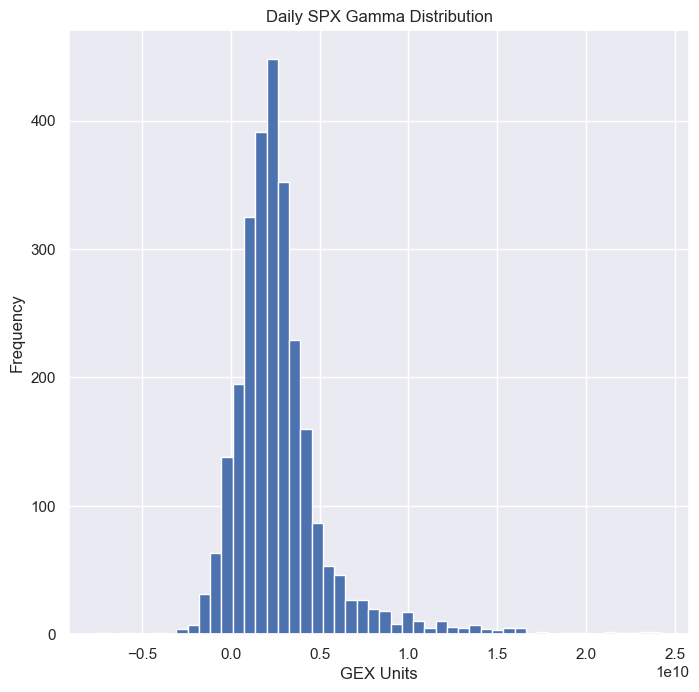

In [34]:
plt.figure(figsize=(8, 8),dpi =70)
plt.hist(combined_day['gex'], bins = 50);
plt.ylabel('Frequency')
plt.xlabel('GEX Units')
plt.title("Daily SPX Gamma Distribution")

In [33]:
daily_liquidity = []
for i in range(len(combined_day)):
    if combined_day.iloc[i]['high'] == combined_day.iloc[i]['low']:
        daily_liquidity.append(combined_day.iloc[i]['volume_scaled']/abs(combined_day.iloc[i]['high'] - combined_day.iloc[i]['vwap']))
    else:
        daily_liquidity.append(combined_day.iloc[i]['volume_scaled']/abs(combined_day.iloc[i]['high'] - combined_day.iloc[i]['low']))

combined_day['liquidity'] = pd.Series(daily_liquidity) 

##### daily liquidity

Text(0.5, 1.0, 'liquidity histogram')

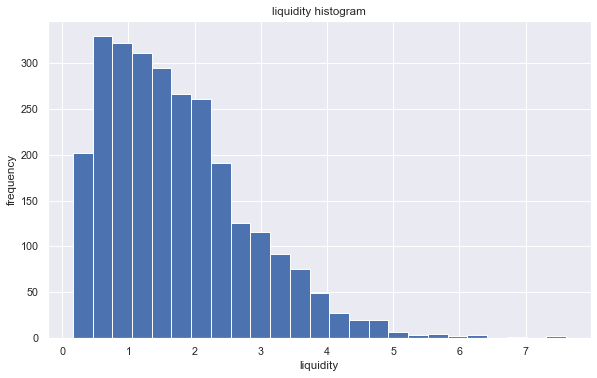

In [40]:
plt.figure(figsize=(10, 6),dpi =70)
plt.hist(combined_day['liquidity'], bins = 25);
plt.xlabel("liquidity")
plt.ylabel('frequency')
plt.title("liquidity histogram")

#### daily log(volume)

Text(0.5, 1.0, 'volume (scaled) histogram')

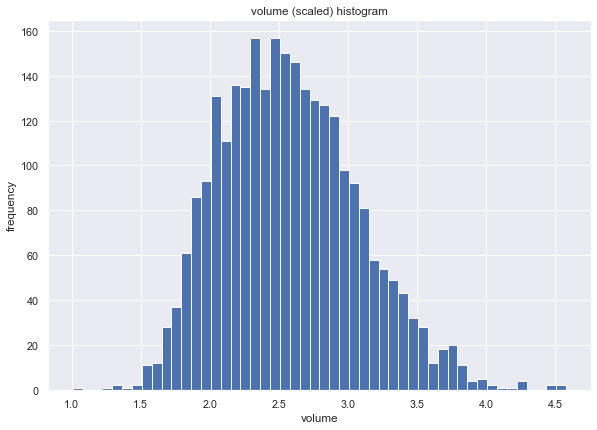

In [60]:
plt.figure(figsize=(10, 7),dpi =70)
plt.hist(combined_day['volume_scaled'], bins = 50);
plt.xlabel("volume")
plt.ylabel('frequency')
plt.title("volume (scaled) histogram")

In [45]:
combined_minute =  pd.merge(spx_gamma,spx_price_minute,on='date',how='inner')
combined_minute['gex_scaled'] = pd.Series(combined_minute['gex']/1e9).apply(lambda x: log_mod(x))
combined_minute['volume'] = combined_minute['volume'].replace(0,np.mean(combined_minute['volume']))
combined_minute['volume_scaled'] = pd.Series(combined_minute['volume']/1e4).apply(lambda x: log_mod(x))

In [46]:
from IPython.display import clear_output

In [54]:
combined_minute['high'] = (combined_minute['high_bid_price'] + combined_minute['high_ask_price'])/2
combined_minute['low'] = (combined_minute['low_bid_price'] + combined_minute['low_ask_price'])/2
combined_minute['liquidity'] = combined_minute['volume_scaled']/abs(combined_minute['high'] - combined_minute['low'])/10
combined_minute['liquidity'] = combined_minute['liquidity'].replace(np.inf, np.mean(combined_minute['liquidity'])).replace(-np.inf, np.mean(combined_minute['liquidity']))
combined_minute['log_liquidity'] = combined_minute['liquidity'].apply(lambda x: log_mod(x))

(0.0, 25.0)

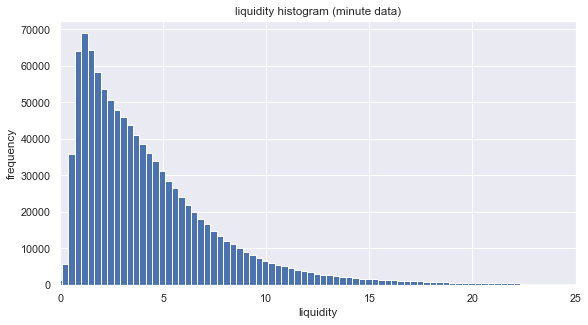

In [62]:
plt.figure(figsize=(9.5, 5),dpi =70)
plt.hist(combined_minute['liquidity'], bins = 1000);
plt.xlabel("liquidity")
plt.ylabel('frequency')
plt.title("liquidity histogram (minute data)")
plt.xlim(0, 25)

(0.0, 25.0)

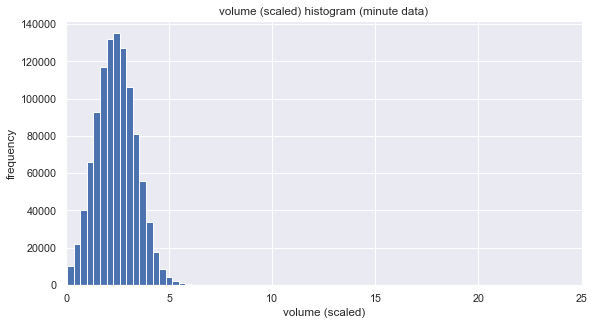

In [66]:
plt.figure(figsize=(9.5, 5),dpi =70)
plt.hist(combined_minute['volume_scaled'], bins = 50       );
plt.xlabel("volume (scaled)")
plt.ylabel('frequency')
plt.title("volume (scaled) histogram (minute data)")
plt.xlim(0, 25)

In [67]:
date_group = combined_minute.groupby('date').mean()[['gex', 'liquidity', 'gex_scaled', 'log_liquidity','high', 'low']]

In [68]:
date_group['std_liquidity'] = [x for x in pd.Series(combined_minute.groupby('date').std()['liquidity'].to_list())]
date_group['std_log_liquidity'] = [x for x in pd.Series(combined_minute.groupby('date').std()['log_liquidity'].to_list())]

Text(0.5, 1.0, 'GEX mean vs log(Liquidity) std-dev Scatterplot (minute data)')

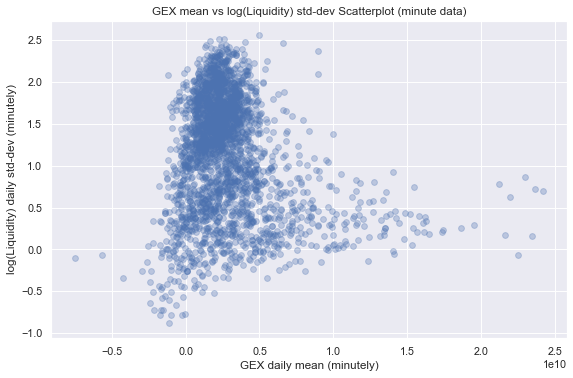

In [83]:
plt.figure(figsize=(9.5, 6),dpi =70)
plt.scatter(date_group['gex'], date_group['log_liquidity'],alpha = 0.3)
plt.xlabel("GEX daily mean (minutely)")
plt.ylabel('log(Liquidity) daily std-dev (minutely)')
plt.title("GEX mean vs log(Liquidity) std-dev Scatterplot (minute data)")

Text(0.5, 1.0, 'GEX mean vs Liquidity std-dev Scatterplot (minute data)')

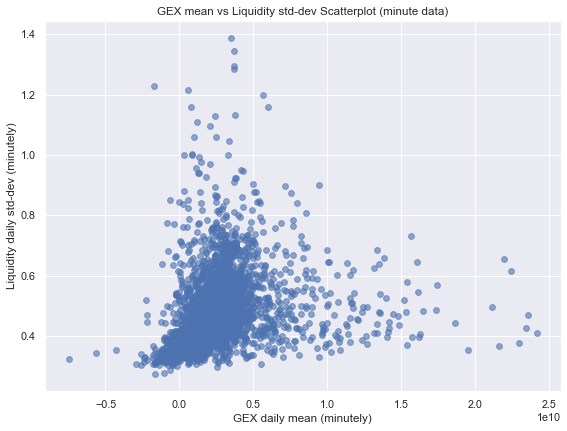

In [86]:
plt.figure(figsize=(9.5, 7),dpi =70)
plt.scatter(date_group['gex'], date_group['std_log_liquidity'],alpha = 0.6)
plt.xlabel("GEX daily mean (minutely)")
plt.ylabel('Liquidity daily std-dev (minutely)')
plt.title("GEX mean vs Liquidity std-dev Scatterplot (minute data)")

In [87]:
date_group.index = pd.to_datetime(date_group.index)
pre_covid = date_group[date_group.index < '2020-03-01']
post_covid = date_group[date_group.index > '2020-03-01']

Text(0.5, 1.0, 'Pre Covid SPX Gamma Vs Average Intraday Liquidity')

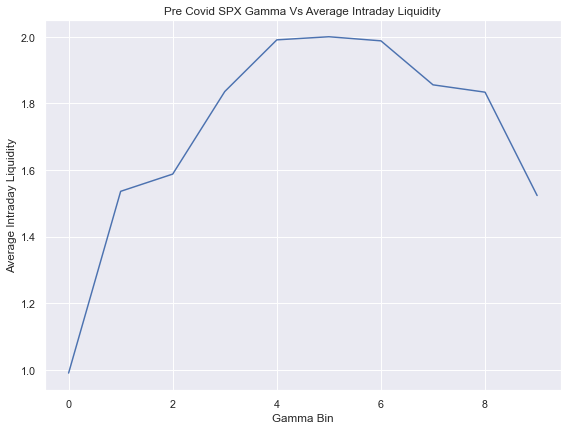

In [91]:
plt.figure(figsize=(9.5, 7),dpi =70)
plt.plot(pre_covid.groupby(pd.qcut(pre_covid['gex'],10)).mean()[['liquidity']]/3)
plt.xlabel("Gamma Bin")
plt.ylabel("Average Intraday Liquidity")
plt.title('Pre Covid SPX Gamma Vs Average Intraday Liquidity')

Text(0.5, 1.0, 'Post Covid SPX Gamma Vs Average Intraday Liquidity')

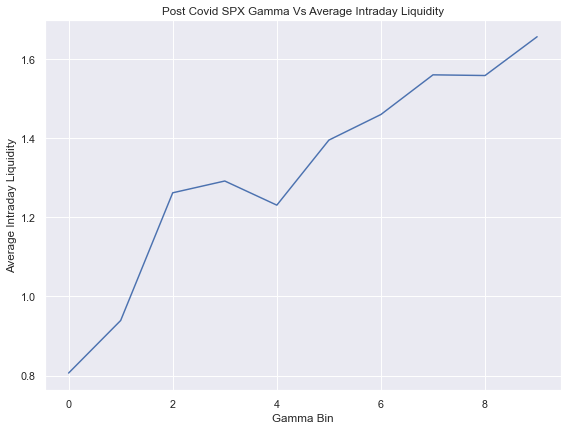

In [92]:
plt.figure(figsize=(9.5, 7),dpi =70)
plt.plot(post_covid.groupby(pd.qcut(post_covid['gex'],10)).mean()[['liquidity']])
plt.xlabel("Gamma Bin")
plt.ylabel("Average Intraday Liquidity")
plt.title('Post Covid SPX Gamma Vs Average Intraday Liquidity')

In [90]:
combined_minute.to_csv('combined_minute.csv')